# IMDB movies analysis and Visualizations


**Imagine I am working under a big production house. And my manager told me, ‘I am planning to invest in a new film. Give me a report that will help me in taking decisions on what kind of movies should I invest in so that I have the maximum profit’**

In [2]:
# importing the library for analysis
import pandas as pd
import numpy as np

#importing the library for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import the required datasets for the analysis and visualization
moviesdf=pd.read_csv("moviesdf.csv")


In [4]:
#looking at all the columns
pd.set_option('display.max_columns',64)

# print the head content of movies dataset
moviesdf.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


**Now we will understand the high-level structure of our data.**

In [5]:
#column-wise info about the movie datasset
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
#describing the data
moviesdf.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,92404.170000,125762.230000,76715.280000,27841.450000,10171.750000,4330.110000,2477.070000,1711.570000,4084.350000,2.714462e+05,64468.860000,1769.050000,1318.950000,435.660000,165863.770000,128473.140000,35739.710000,124561.100000,103437.920000,19371.540000,24170.160000,19653.260000,4093.530000,624.370000,54096.740000,188245.680000,7.852000,7.910000,8.205000,8.174000,8.215000,8.005000,8.005000,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,75666.918775,62162.752481,32586.358624,12883.912563,5480.914204,2713.608902,1768.167506,1318.631164,3489.778403,1.676580e+05,39117.954828,1324.522818,1040.959361,366.499996,103522.932356,83188.725257,23092.041366,72089.245359,61116.374727,11324.680698,12841.696513,10669.041306,2187.955655,133.244262,32115.288162,106902.256347,0.263036,0.298312,0.305959,0.358059,0.381484,0.271686,0.281904,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,7321.000000,11668.000000,8558.000000,3370.000000,1162.000000,456.000000,227.000000,158.000000,293.000000,2.244100e+04,9552.000000,121.000000,95.000000,20.000000,15959.000000,10150.000000,4370.000000,12174.000000,9280.000000,2682.000000,1899.000000,1496.000000,355.000000,198.000000,3678.000000,19009.000000,7.400000,7.300000,7.500000,7.400000,7.200000,7.600000,7.600000,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,47098.250000,83207.500000,54934.500000,17834.500000,6026.000000,2293.500000,1172.750000,761.750000,1532.750000,1.719362e+05,35188.750000,756.250000,579.000000,159.750000,109797.750000,77537.750000,17637.750000,78866.250000,64930.250000,12030.500000,15288.750000,12154.750000,2492.750000,545.000000,33328.750000,121863.500000,7.675000,7.700000,8.000000,7.900000,7.975000,7.800000,7.800000,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,71376.000000,117405.500000,76862.000000,27072.000000,9123.000000,3801.000000,1950.000000,1320.000000,2933.000000,2.381995e+05,58539.500000,1420.000000,998.000000,325.500000,139321.500000,111362.000000,32639.500000,111317.500000,94010.500000,17763.000000,21869.500000,17782.000000,3771.500000,639.500000,48560.000000,169132.000000,7.800000,7.900000,8

In [7]:
#checking for null values if present then simply print the number of null values
moviesdf.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [8]:
#dimensions of the dataset
moviesdf.shape

(100, 62)

**DATA ANALYSIS**

**The first thing I will do, is to break my problem in parts and think straight, First, let me see how these different movies performed in terms of ROI and then who are the top performers. For that I would be needing these basic information:**

1. Movie attributes
2. The budget of the movie
3. Profit earned by the movie


**Reducing digits for better readability**


The numbers in the budget and gross are too big. Let's convert the unit of the budget and gross columns from $ to million $ first.

In [9]:
# Divide the 'gross' and 'budget' column by 1000000 to convert '$' to 'million $'

moviesdf['Gross']= moviesdf['Gross'].floordiv(1000000)
moviesdf['budget']=moviesdf['budget'].floordiv(1000000)

In [10]:
# Now creating a another column named "profit" which is the difference of gross and budget.
moviesdf.insert(4, column='Profit', value= moviesdf['Gross']-moviesdf['budget'])
moviesdf

,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30,151,121,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150,341,191,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12,51,39,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47,100,53,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9,47,38,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3,13,10,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,88.0,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3,8,5,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,7.9,Drama,Romance,NaN,94.0,109,16953,22109,31439,19251,8142,3412,1649,1033,826,1745,67076,23823,208,138,66,43312,30016,12857,37072,28401,8189,7479,5891,1470,447,12382,59116,7.9,7.8,8.1,8.3,7.4,8.1,8.2,7.9,7.8,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,691,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150,296,146,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,7.7,Adventure,Family,Fantasy,65.0,146,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,223868,79506,1967,1310,638,178871,126052,51112,94

In [11]:
#Sorting the dataframe moviesdf with Profit in descending order

moviesdf.sort_values(by=['Profit'], ascending= False, inplace=True, ignore_index= True)

# Now extracting the top 10 values from the moviesdf dataframe in another dataframe say top10 and store the Title 

top10=moviesdf.loc[0:9, 'Title']

top10

0    Star Wars: Episode VII - The Force Awakens
1                                  The Avengers
2                                      Deadpool
3               The Hunger Games: Catching Fire
4                                   Toy Story 3
5                         The Dark Knight Rises
6                                The Lego Movie
7                                      Zootopia
8                                 Despicable Me
9                                    Inside Out
Name: Title, dtype: object

**Plotting a scatterplot between the columns budget and profit**

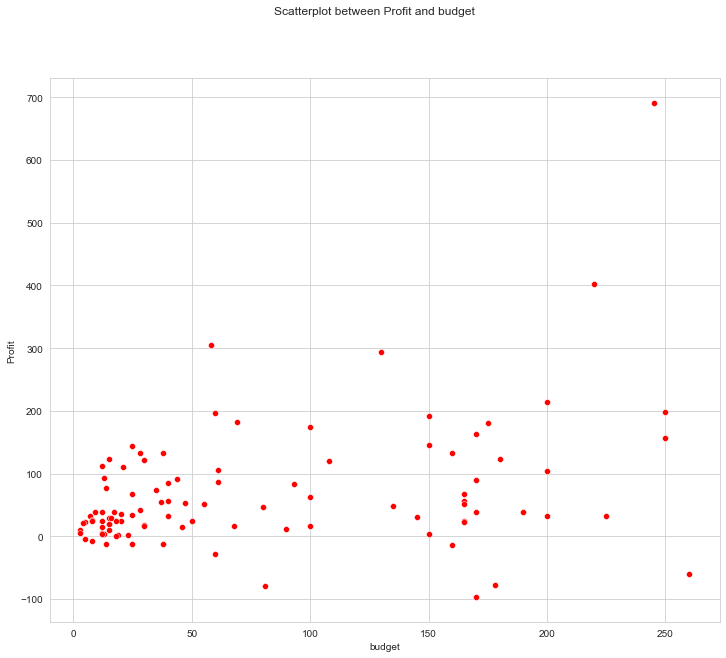

In [21]:
#plot Profit vs budget
plt.figure(figsize=[12,10])
sns.scatterplot(x='budget', y='Profit', data=moviesdf, color='red')
plt.suptitle("Scatterplot between Profit and budget")
plt.xlabel('budget')
plt.ylabel('Profit')
plt.show()



**So here my first visualization...............**

My observations are as follows:

1. Individually inspecting budget and profit, both are slightly skewed to right, which means most of the movies have positive profit and also budgets are high

2. I can observe that there are a couple of movies that have very high budgets but still having negative profits

3. I can see a slightly positive trend between ‘budget’ and ‘profit’ i.e, as budget increases, profit also increases

4. Between 0–100 mln budget, I can see a good number of movies providing profit ranging from 0–300 mln dollars (excluding negative profit movies)





  The dataset contains the 100 best performing movies from the year 2010 to 2016. However, a scatter plot tells a different story. I can notice that there are some movies with negative profit. Although good movies do incur losses, there appear to be quite a few movies with losses. What can be the reason behind this? Let me have a closer look at this by finding the movies with negative profit.

In [25]:
#Extract the movies with a negative profit and store them in a new dataframe — neg_profit
neg_profit=moviesdf[moviesdf['Profit']<0]
neg_profit.reset_index(drop=True)

#sorting the value with largest negative profit value
neg_profit.sort_values(by='Profit')[0:5]

,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
99,Hugo,2011,170,73,-97,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,7.5,Adventure,Drama,Family,83.0,126,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,179655,47795,884,616,250,105814,79064,25620,93126,76098,15694,22136,17667,4065,669,39127,142850,7.5,7.6,7.8,7.8,7.6,7.7,7.7,7.7,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA
98,The Little Prince,2015,81,1,-80,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,7.8,Animation,Adventure,Drama,70.0,108,7565,7321,11668,8558,3370,1162,456,227,158,293,22441,9552,226,128,96,15959,10150,5610,12174,9280,2682,1899,1496,355,198,3678,19009,7.6,8.1,8.0,7.8,8.2,7.9,7.8,8.2,7.6,7.5,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France
97,Edge of Tomorrow,2014,178,100,-78,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,7.9,Action,Adventure,Sci-Fi,71.0,113,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,341199,45790,1893,1584,292,172016,148814,21495,157476,138752,16463,30965,26562,3820,691,55486,217557,7.9,7.8,8.2,8.1,8.2,8.0,8.0,7.8,7.8,7.8,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA
96,Tangled,2010,260,200,-60,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,7.8,Animation,Adventure,Comedy,71.0,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA
95,Scott Pilgrim vs. the World,2010,60,31,-29,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,7.5,Action,Comedy,Romance,69.0,112,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,208417,45718,1022,791,221,129202,99363,28557,102986,88456,13334,14195,12157,1778,677,56559,150511,7.5,7.4,8.1,8.2,8.0,7.6,7.7,7.5,7.4,7.4,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA


Can you spot the movie Tangled in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest-grossing movies of all time, it has a negative profit as per this result. If you cross-check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also on the list.









Now, let’s say I want to find out the popular movies, by popular I mean they have a good public response.

**How do I find that?…**

I have a column 'MetaCritic' in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, I also have another column IMDb_rating that tells me the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience.

The General Audience and the Critics
As a part of this analysis, I will figure out the highest rated movies which have been liked by critics and audiences alike.

Firstly I will notice that the MetaCritic the score is on a scale of 100 whereas the IMDb_rating is on a scale of 10. First, convert the MetaCritic column to a scale of 10.
Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall,

**I need to -**

Create a new column Avg_rating which will have the average of the MetaCritic and Rating columns
Get the list of movies in descending order of Avg_rating

In [26]:
#first changing the scale of MetaCritic from 100 to 10
moviesdf['MetaCritic']= moviesdf['MetaCritic']/10
moviesdf['MetaCritic']

0     8.1
1     6.9
2     6.5
3     7.6
4     9.2
     ... 
95    6.9
96    7.1
97    7.1
98    7.0
99    8.3
Name: MetaCritic, Length: 100, dtype: float64

In [29]:
#After that create a column Avg_rating and store the average of updated MetaCritic and IMDB_rating, then insert into dataframe

moviesdf.insert(18, column='Avg_rating', value= moviesdf.loc[:,['MetaCritic', 'IMDb_rating']].mean(axis=1))

In [30]:
#now sorting the dataframe with Avg_rating in decending order
moviesdf.sort_values(by='Avg_rating', ascending=False, inplace=True)

Now find out the movies whose both 'MetaCritic' and 'IMDb_rating' on higher scale.....that are very popular.

first, I create a dataframe in which we store that popular movies.

I will extract that popular movies by applying two condition.....

a. to find absolute difference of 'MetaCritic' and 'IMDb_rating' and that should be less that 0.5  And
b. also the 'Avg_rating' should be greater than 8.0

In [32]:
#finding the high rated movies using above two condition and store in High_rated

High_rated=moviesdf[abs(moviesdf['MetaCritic']-moviesdf['IMDb_rating'])<0.5]

High_rated[(abs(moviesdf['MetaCritic']-moviesdf['IMDb_rating'])<0.5) & (moviesdf['Avg_rating']>=8.0)].sort_index()[0:5]

C:\Users\niraj\AppData\Local\Temp/ipykernel_10768/1662926469.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  High_rated[(abs(moviesdf['MetaCritic']-moviesdf['IMDb_rating'])<0.5) & (moviesdf['Avg_rating']>=8.0)].sort_index()[0:5]


,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Star Wars: Episode VII - The Force Awakens,2015,245,936,691,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,8.10,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
21,The Martian,2015,108,228,120,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,8.00,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA
24,Gone Girl,2014,61,167,106,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,8.1,Crime,Drama,Mystery,7.9,149,89539,8.00,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA
36,Django Unchained,2012,100,162,62,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,8.25,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA
40,Arrival,2016,47,100,53,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,8.05,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA


In [33]:
#now sorting the new dataframe with 'Avg_rating' in descending order and then reset the index of that dataframe

High_rated.sort_values(by='Avg_rating', ascending=False, inplace=True)
High_rated.reset_index(drop=True, inplace=True)
High_rated.head()

C:\Users\niraj\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Whiplash,2014,3,13,10,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,8.65,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
1,Django Unchained,2012,100,162,62,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,8.25,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA
2,Dallas Buyers Club,2013,5,27,22,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,8.0,Biography,Drama,NaN,8.4,117,37544,8.20,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA
3,Star Wars: Episode VII - The Force Awakens,2015,245,936,691,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,8.10,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
4,Arrival,2016,47,100,53,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,8.05,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA


**Now, My production company is looking to make a blockbuster movie. There will primarily be three lead roles in your movie and the company wishes to cast the most popular actors for it.**

Since My manager doesn’t want to take a risk, he asked me to cast a trio that has already acted together in a movie before.

**So my next task would be-**

Find the Most Popular Trios — I
The metric that I’ve chosen to check the popularity is the Facebook likes of each of these actors

The dataframe has three columns to help me out for the same, viz. actor_1_facebook_likes, actor_2_facebook_likes, and actor_3_facebook_likes

**My objective is to:**

Find the trios which have the most number of Facebook likes combined. That is, the sum of actor_1_facebook_likes, actor_2_facebook_likes, and actor_3_facebook_likes should be maximum.
Find out the top 5 popular trios, and output their names in a list

In [34]:
#Adding a column Popularity that sums up the facebook likes of all the three actor
moviesdf.insert(11, column='Popularity', value=moviesdf.loc[:, ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1))

In [35]:
top_popular_actors=moviesdf.sort_values(by='Popularity', ascending=False, ignore_index=True).loc[0:4,:]
top_popular_actors

,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Popularity,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,...,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Lion,2016,12,51,39,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0,8.1,Biography,Drama,NaN,6.9,118,23325,7.50,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,...,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
1,Inception,2010,160,292,132,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0,8.8,Action,Adventure,Sci-Fi,7.4,148,584839,8.10,485218,304457,130972,46393,20595,10050,6631,5243,15365,1044318,239796,5678,...,1184,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA
2,X-Men: Days of Future Past,2014,200,233,33,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0,8.0,Action,Adventure,Sci-Fi,7.4,132,91765,7.70,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,...,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,PG-13,USA
3,Manchester by the Sea,2016,9,47,38,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0,7.9,Drama,NaN,NaN,9.6,137,18191,8.75,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,...,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
4,The Dark Knight Rises,2012,250,448,198,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0,8.4,Action,Thriller,NaN,7.8,164,380589,8.10,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,...,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA


In [36]:
top_5_popular_trios= moviesdf.sort_values(by='Popularity', ascending=False, ignore_index=True).loc[0:4,['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()
top_5_popular_trios

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

Hmm, I got the top popular actors, but I am not satisfied with the result. Let’s take it to the next level

**Find the Most Popular Trios — II**
In the previous subtask, I found the popular trio based on the total number of Facebook likes. Let’s add a small condition to it and make sure that all three actors are popular. The condition is none of the three actors’ Facebook likes should be less than half of the other two. 


In [42]:
indiv_popularity=moviesdf[~((((moviesdf['actor_1_facebook_likes'] < moviesdf['actor_2_facebook_likes']/2) | 
                            (moviesdf['actor_1_facebook_likes'] < moviesdf['actor_3_facebook_likes']/2))==True)
                           | (((moviesdf['actor_2_facebook_likes'] < moviesdf['actor_1_facebook_likes']/2) | 
                            (moviesdf['actor_2_facebook_likes'] < moviesdf['actor_3_facebook_likes']/2))==True)
                           | (((moviesdf['actor_3_facebook_likes'] < moviesdf['actor_1_facebook_likes']/2) | 
                            (moviesdf['actor_3_facebook_likes'] < moviesdf['actor_2_facebook_likes']/2))==True))]
indiv_popularity.shape

(21, 65)

In [43]:
#common elements of two dataframe
common_actors = top_popular_actors[top_popular_actors['Title'].isin(indiv_popularity['Title'])]

#Number of trios satisfying the condition
common_actors.loc[:, ['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

In [44]:
top_indiv_popularity= indiv_popularity.sort_values(by='Popularity', ascending = False)[0:5].reset_index(drop=True)
top_indiv_popularity.loc[0:5, ['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

Now I’m quite happy with my result. And this list even has my favorite superstars.



There is a column named Runtime in the dataframe which primarily shows the length of the movie. It might be interesting to see how this variable is distributed. Plot a histogram or distplot of seaborn to find the Runtime range most of the movies fall into.

C:\Users\niraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


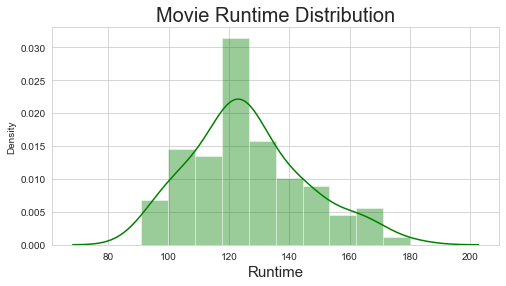

In [45]:
#runtime histogram/density plot
plt.figure(figsize=[8,4])
run=sns.distplot(moviesdf['Runtime'], color='green')
run.axes.set_title("Movie Runtime Distribution", fontsize=20)
run.set_xlabel("Runtime", fontsize=15)
plt.show()

Okay, another observation I had, I can see most of the movies falls within 120–130 min of runtime.

Let’s do some analysis on R- rated movies. Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group.

All the parents in the house, the result is for you guys to keep a check on your children:- P

R- rated movies
1. Filter out movies that are R- rated

2. Sort them by ‘CVotesU18’ in descending order

3. Get the top 5

In [47]:
content_r=moviesdf[moviesdf['content_rating']=='R']
PopulaR=content_r.sort_values(by='CVotesU18', ascending=False, ignore_index=True)[0:10]
PopulaR.head()

,Title,title_year,budget,Gross,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Popularity,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,...,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Deadpool,2016,58,363,305,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,17166.0,8.0,Action,Adventure,Comedy,6.5,108,147467,7.25,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,...,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA
1,The Wolf of Wall Street,2013,100,116,16,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,44000.0,8.2,Biography,Comedy,Crime,7.5,180,171660,7.85,236650,250667,129164,46715,18682,8674,5854,4258,9689,559564,123698,3622,...,757,360841,286627,70874,227096,189110,34712,39996,32676,6629,730,89006,366829,8.2,7.8,8.6,8.7,8.0,8.4,8.5,7.9,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,R,USA
2,Django Unchained,2012,100,162,62,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,40265.0,8.4,Drama,Western,NaN,8.1,165,234824,8.25,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,...,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA
3,Mad Max: Fury Road,2015,150,153,3,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,36943.0,8.1,Action,Adventure,Sci-Fi,9.0,120,136194,8.55,158403,163494,97218,42636,19505,9932,6743,4930,10516,424435,69670,3159,...,456,238202,198026,37751,183637,159520,21373,34848,29980,4209,726,73080,267084,8.1,7.9,8.5,8.6,8.4,8.3,8.3,8.1,8.0,8.0,7.8,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia
4,Whiplash,2014,3,13,10,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,25505.0,8.5,Drama,Music,NaN,8.8,107,110404,8.65,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,...,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA


**Hmm. Seems like ‘Deadpool’, ‘Wolf of Wall Street’ are very popular amongst the young.**

Now moving ahead, I noticed that there are plenty of columns names as ‘CVotes’ and ‘Votes’ across various demographics. I want to bring out something from them.

If I am not wrong my manager wants to make a movie that gives high ROI. (Always go back to the business objective) High ROI means that the movie should be popular amongst people so that they buy tickets for it. 

**Demographics Analysis**

If I take a look at the last columns in the dataframe, they provided a good quantitative sense of the voters (in the last analysis I made use one of the column— CVotesU18) and also have three genre columns indicating the genres of a particular movie. 

Okay, this will be the final stage of my analysis wherein I will analyze the voters across all demographics and also see how these vary across various genres. let’s get started with demographic analysis.........

**I will do above in following steps....**

--> Combine dataframe by genre
--> There are 3 columns in the dataframe — genre_1, genre_2, and genre_3. As a part of this analysis, I need to aggregate a few values over these 3 columns.

--> First, create a new dataframe df_by_genre that contains genre_1, genre_2, and genre_3 and all the columns related to CVotes/Votes from the movies data frame. There are 47 columns to be extracted in total.

--> Now, add a column called cnt to the dataframe df_by_genre and initialize it to one. I realize the use of this column by the end of this analysis

--> Group the dataframe df_by_genre by genre_1 and find the sum of all the numeric columns such as cnt, columns related to CVotes and Votes columns and store it in a dataframe df_by_g1

--> Performing the same operation for genre_2 and genre_3 and store it dataframes df_by_g2 and df_by_g3 respectively

In [50]:
#creating a dataframe df_by_genre
column_list=[]
for i in moviesdf.columns:
    if i.startswith('CV') | i.startswith('V') | i.startswith('ge'):
        column_list.append(i)

df_by_genre= moviesdf.loc[:, column_list]

#create a column cnt and initialize it to 1
df_by_genre['cnt']=1

#group the movies by the individual genre
df_by_g1=df_by_genre.groupby('genre_1')
df_by_g2=df_by_genre.groupby('genre_2')
df_by_g3=df_by_genre.groupby('genre_3')

#finding the sum of individual groupedmovies
df_by_g1 = pd.DataFrame(df_by_g1.sum())
df_by_g2 = pd.DataFrame(df_by_g2.sum())
df_by_g3 = pd.DataFrame(df_by_g3.sum())

--> Now that I have 3 dataframes performed by grouping over genre_1, genre_2, and genre_3 separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe df_add, so that the corresponding values of Votes/CVotes get added for each genre.

--> The column cnt on aggregation has basically kept the track of the number of occurrences of each genre. Subset the genres that have at least 10 movies into a new dataframe genre_top10 based on the cnt column value.



In [51]:
#Add the grouped dataframe and store it in a new dataframe

add_g1_g2 = df_by_g1.add(df_by_g2, fill_value=0)
add_df = add_g1_g2.add(df_by_g3, fill_value=0)

genre_top10 = add_df[add_df['cnt']>=10]
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,10837034.0,2105410.0,76280.0,59424.0,16302.0,6314227.0,5105793.0,1146894.0,4824318.0,4117926.0,639437.0,894736.0,746866.0,132357.0,21123.0,2144895.0,7005964.0,243.2,245.6,253.8,252.8,256.8,247.8,247.5,248.0,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,11759815.0,2705904.0,95791.0,72215.0,22864.0,7165429.0,5578727.0,1516049.0,5262641.0,4400217.0,788533.0,1012382.0,832607.0,162152.0,25157.0,2345901.0,7905326.0,298.4,304.5,311.4,309.3,314.9,304.9,304.3,307.3,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,2282985.0,724844.0,23835.0,16354.0,7307.0,1588630.0,1140646.0,432464.0,1043387.0,834069.0,195268.0,179365.0,142636.0,33699.0,6364.0,524406.0,1654665.0,86.4,89.3,88.9,87.7,90.7,88.5,87.9,90.2,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,4329471.0,986889.0,20937.0,15962.0,4780.0,2603294.0,2052779.0,524830.0,1999316.0,1658844.0,312373.0,405909.0,324710.0,74280.0,10804.0,817016.0,3078088.0,141.1,141.8,146.9,146.6,146.9,143.4,143.7,142.8,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,5223033.0,1498288.0,37971.0,27099.0,10574.0,3404755.0,2507369.0,862715.0,2453650.0,1985974.0,433363.0,458960.0,367532.0,83303.0,13934.0,1132079.0,3815002.0,180.2,181.2,187.4,186.9,186.9,183.6,183.8,182.8,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


--> Now, take the mean of all the numeric columns by dividing them with the column value cnt and store it back to the same dataframe. I will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe movies

--> Since the number of votes can’t be a fraction, typecasting all the CVotes related columns to integers. Also, round off all the Votes related columns up to two digits after the decimal point.


In [53]:
#Extracting the count column for further use
count_column =  genre_top10['cnt']

#take the mean for every column by dividing with cnt
genre_top10 = genre_top10.div(genre_top10['cnt'], axis='index')

#Rounding off the columns of votes to two decimals
genre_top10 = genre_top10.apply(lambda x: round(x, 2), axis=0)
genre_top10.drop(columns='cnt', inplace=True)

In [55]:
#Converting CVotesto int type
col_cvotes_list=[]

for i in genre_top10.columns:
    if i.startswith('CVotes'):
        col_cvotes_list.append(i)

genre_top10[col_cvotes_list] = genre_top10[col_cvotes_list].astype('int')
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,207544,65894,2166,1486,664,144420,103695,39314,94853,75824,17751,16305,12966,3063,578,47673,150424,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78


If take a look at the final dataframe that I have gotten, now I have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. I can use this dataset to extract exciting insights about the voters!

**Genre counts**
I will now make a bar chart plotting different genres vs cnt using seaborn and derive some insights from this data frame

In [104]:
#binding count column to the data frame
cnt=count_column
genre_top10['cnt'] = cnt

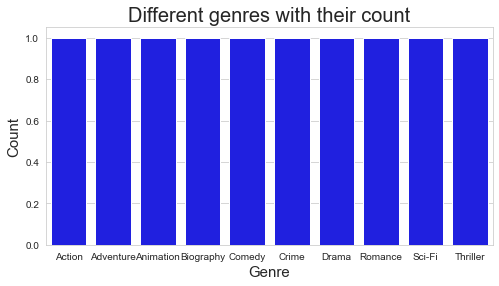

In [105]:
#Bar chart for genres
plt.figure(figsize=[8,4])
sns.barplot(x=genre_top10.index, y=genre_top10.cnt, color='blue')
plt.title('Different genres with their count', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Okay!! The data set of the top 100 movies has Drama genre the most. For now, I can’t say anything about the popularity of genres simply by seeing this chart. This chart only gives the numbers and nothing else.

Let's deep dive further!!

If I have closely looked at the Votes- and CVotes-related columns, and noticed the suffixes F and M indicating Female and Male. Since I have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe

**Gender and Genre**
Note: I will use genre_top10 dataframe for this analysis

I will make the first heatmap to see how the average number of votes of males is varying across the genres. Use a seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., CVotesU18M,CVotes1829M, CVotes3044M, and CVotes45AM. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group
Make the second heatmap to see how the average number of votes of females is varying across the genres. Use a seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., CVotesU18F,CVotes1829F, CVotes3044F, and CVotes45AF. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group

C:\Users\niraj\AppData\Local\Temp/ipykernel_10768/3828081813.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  male_cvote_genre = genre_top10.groupby(genre_top10.index)['CVotesU18M', 'CVotes1829M', 'CVotes3044M', 'CVotes45AM'].mean()
C:\Users\niraj\AppData\Local\Temp/ipykernel_10768/3828081813.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  female_cvote_genre=genre_top10.groupby(genre_top10.index)['CVotesU18F', 'CVotes1829F', 'CVotes3044F', 'CVotes45AF'].mean()


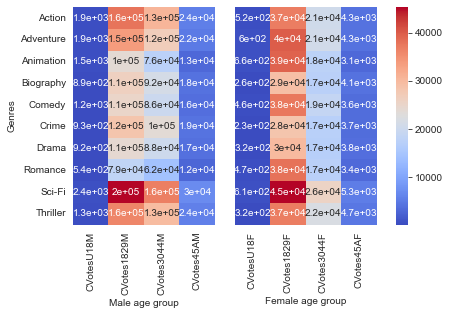

<Figure size 432x288 with 0 Axes>

In [93]:
#1st set of heat maps for CVotes-related columns
male_cvote_genre = genre_top10.groupby(genre_top10.index)['CVotesU18M', 'CVotes1829M', 'CVotes3044M', 'CVotes45AM'].mean()
female_cvote_genre=genre_top10.groupby(genre_top10.index)['CVotesU18F', 'CVotes1829F', 'CVotes3044F', 'CVotes45AF'].mean()

f,(ax1, ax2, axcb)=plt.subplots(1,3, gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax1, ax2)
g1 = sns.heatmap(male_cvote_genre, cmap="coolwarm", annot=True, cbar=False, ax=ax1)
g1.set_ylabel('Genres',fontsize=10)
g1.set_xlabel('Male age group', fontsize=10)
g2=sns.heatmap(female_cvote_genre, cmap="coolwarm", annot=True, cbar_ax=axcb, ax=ax2)
g2.set_ylabel(' ')
g2.set_xlabel('Female age group', fontsize=10)
g2.set_yticks([])

#may be needed to rotate the ticklabels correctly
for ax in [g1,g2]:
    t1=ax.get_xticklabels()
    ax.set_xticklabels(t1, rotation=90)
    tly=ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    
plt.show()
plt.tight_layout()

Great! Let’s now derive some insights and observations from the above chart

Inferences: A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18–29 age group irrespective of their gender.

Inference 1: Age ranging from 18–44 have voted the most irrespective of their gender
Inference 2: Even if Sci-Fi has a lesser count compared to other genres (previous bar chart) still it has the highest number of votes
Inference 3: U18M voted more than U18F. In general, movies seem to be watched less by U18 and 45A irrespective of their age or they watched but didn’t vote
Inference 4: Females on average (ages ranging from 18 to 44) voted movies of Action, Adventure, Animation, Comedy, Romance and Thriller more (after Sci-Fi) compared to males
Inference 5: Romance is the least voted by Male irrespective of their age compared to other genres (taking only the gender male), the number of votes may be higher than females but if only male gender is considered, they voted least for romance.
3. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use a seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., VotesU18F, Votes1829F, Votes3044F, and Votes45AF. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group

C:\Users\niraj\AppData\Local\Temp/ipykernel_10768/764101292.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  male_vote_genre = genre_top10.groupby(genre_top10.index)['VotesU18M', 'Votes1829M', 'Votes3044M', 'Votes45AM'].mean()
C:\Users\niraj\AppData\Local\Temp/ipykernel_10768/764101292.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  female_vote_genre=genre_top10.groupby(genre_top10.index)['VotesU18F', 'Votes1829F', 'Votes3044F', 'Votes45AF'].mean()


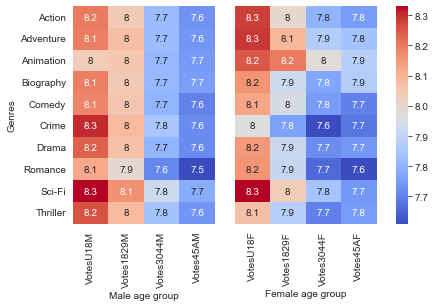

<Figure size 432x288 with 0 Axes>

In [95]:
#Second set of heat maps for Votes-related columns
male_vote_genre = genre_top10.groupby(genre_top10.index)['VotesU18M', 'Votes1829M', 'Votes3044M', 'Votes45AM'].mean()
female_vote_genre=genre_top10.groupby(genre_top10.index)['VotesU18F', 'Votes1829F', 'Votes3044F', 'Votes45AF'].mean()

f,(ax1, ax2, axcb)=plt.subplots(1,3, gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax1, ax2)
g1 = sns.heatmap(male_vote_genre, cmap="coolwarm", annot=True, cbar=False, ax=ax1)
g1.set_ylabel('Genres',fontsize=10)
g1.set_xlabel('Male age group', fontsize=10)
g2=sns.heatmap(female_vote_genre, cmap="coolwarm", annot=True, cbar_ax=axcb, ax=ax2)
g2.set_ylabel(' ')
g2.set_xlabel('Female age group', fontsize=10)
g2.set_yticks([])

#may be needed to rotate the ticklabels correctly
for ax in [g1,g2]:
    t1=ax.get_xticklabels()
    ax.set_xticklabels(t1, rotation=90)
    tly=ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    
plt.show()
plt.tight_layout()

**Inferences:**

Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. Some of the other inferences can be -

-> It is interesting to see that though the average number of votes for romance is less by male the average rating is more or less same as females, this means romance movies, in general, are watched less or voted less by males but the movies are good as they are rated well irrespective of gender especially for U18

-> Irrespective of gender, age ranging from 30–45 have their average rating to different genres is around 7.7 to 7.8, most of them didn’t cross 8. A slight observation can be made (no causal relationship) that as your age increases you tend to become a critic

-> I can see Animation genres has been voted steadily in Female gender, whereas in the male there is a significant difference (decrease) as age increases, It is interesting to observe that females of all age likes animation movies



Can you see the dataset contains both the US and non-US movies? Let’s analyze how both the US and the non-US voters have responded to the US and the non-US movies

**The USA vs non-USA cross-analysis**

 I will use the movies dataframe for this subtask. I make use of this documentation to format my boxplot - boxplot

I will here create a column IFUS in the dataframe movies. The column IFUS should contain the value "USA" if the Country of the movie is "USA". For all other countries other than the USA, IFUS should contain the value non-USA.
Now make a boxplot that shows how the number of votes from the US people i.e. CVotesUS is varying for the US and non-US movies. Make use of the column IFUS to make this plot. Similarly, make another subplot that shows how non-US voters have voted for the US and non-US movies by plotting CVotesnUS for both the US and non-US movies.

In [97]:
moviesdf['IFUS']=moviesdf['Country'].apply(lambda x: 'USA'if x=='USA' else 'non-USA')

<Figure size 720x720 with 0 Axes>

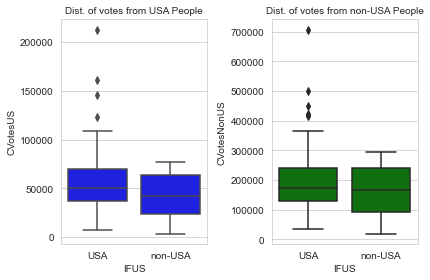

In [99]:
#Box plot-1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=[10,10])
fig,axes = plt.subplots(nrows=1, ncols=2)
b1=sns.boxplot(x='IFUS', y='CVotesUS', data=moviesdf, orient='v', ax=axes[0], color='blue')
b1.axes.set_title('Dist. of votes from USA People', fontsize=10)
b1.set_ylabel('CVotesUS', fontsize=10)
b1.set_xlabel('IFUS', fontsize=10)

b2=sns.boxplot(x='IFUS', y='CVotesnUS', data=moviesdf, orient='v', ax=axes[1], color='green')
b2.axes.set_title('Dist. of votes from non-USA People', fontsize=10)
b2.set_ylabel('CVotesNonUS', fontsize=10)
b2.set_xlabel('IFUS', fontsize=10)
plt.tight_layout()   ##  for non-overlapping labels 

**Inferences:**

-> I can observe the number of votes on average is more from non-USA people compared to USA people irrespective of the origin of the USA or non-USA movies

-> I can observe non-USA movies the number of votes is uniformly distributed compared to USA movies

->I can see there is a significant difference in the number of votes from USA people for USA and non-USA movies. USA people voted less in number for non-USA movies

-> From both the plots you can see some outliers for USA movies

-> Overall USA movies got a greater number of votes from both USA and non-USA people compared to non-USA movies



Again I will do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. VotesUS is varying for the US and non-US movies. Similarly, make another subplot that shows how VotesnUS is varying for the US and non-US movies.



<Figure size 720x720 with 0 Axes>

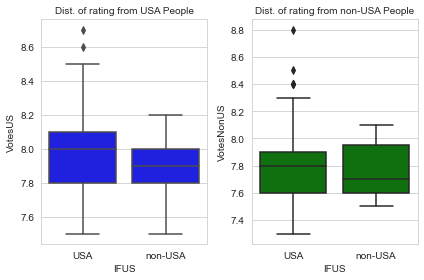

In [100]:
#Box plot-2: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=[10,10])
fig,axes = plt.subplots(nrows=1, ncols=2)
b3=sns.boxplot(x='IFUS', y='VotesUS', data=moviesdf, orient='v', ax=axes[0], color='blue')
b3.axes.set_title('Dist. of rating from USA People', fontsize=10)
b3.set_ylabel('VotesUS', fontsize=10)
b3.set_xlabel('IFUS', fontsize=10)

b4=sns.boxplot(x='IFUS', y='VotesnUS', data=moviesdf, orient='v', ax=axes[1], color='green')
b4.axes.set_title('Dist. of rating from non-USA People', fontsize=10)
b4.set_ylabel('VotesNonUS', fontsize=10)
b4.set_xlabel('IFUS', fontsize=10)
plt.tight_layout()   ##  for non-overlapping labels

**Inferences:**

-> On average I can see the median rating is higher (around 7.9 to 8) from USA people compared to that from non- USA people

-> It is interesting to see that both USA and non-USA people have rated non-USA movies significantly less than that of USA movies (difference for non-USA people is greater than that of USA people)

-> Distribution of rating for non-USA movies by USA people has a uniform distribution compared to others

-> An important observation can be derived from both the pair of boxplots is that even though the median number of votes from non-USA people is much higher than of USA people but their median rating is less than that compared to US people, one of the many possible reasons can be

Population- Assuming, outside the USA means voters from Asian countries, European countries, etc which constitute large chunk, so as the population is more we can have more number of critics also

Top 1000 voters vs Genres (last analysis)

I might have also observed the column CVotes1000. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres.



Sort the dataframe genre_top10 based on the value of CVotes1000in descending order.
Make a seaborn barplot for genre vs CVotes1000

In [101]:
#Sorting by CVotes1000

genre_top10_Cvotes = genre_top10.sort_values(by='CVotes1000', ascending=False)

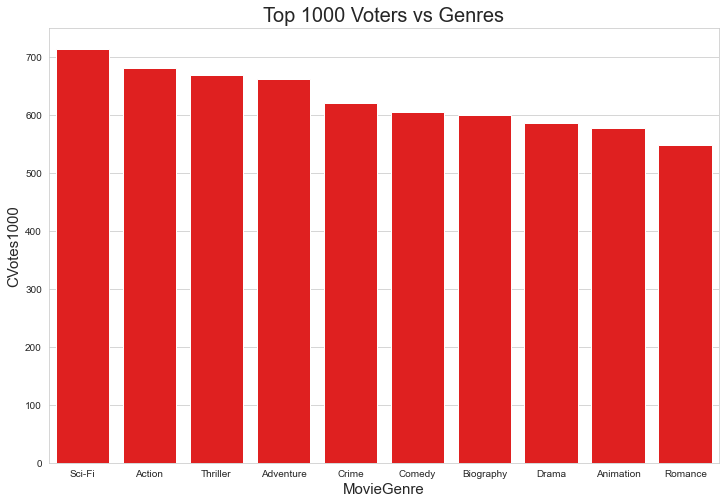

In [103]:
# BarPlot

plt.figure(figsize=[12,8])
sns.barplot(x=genre_top10_Cvotes.index, y=genre_top10_Cvotes.CVotes1000, color='red')
plt.title('Top 1000 Voters vs Genres', fontsize=20)
plt.xlabel('MovieGenre', fontsize=15)
plt.ylabel('CVotes1000', fontsize=15)
plt.show()

**Inferences:**

-> The romance genre has been voted the least from the top 1000 voters

-> Sci-Fi is the most popular amongst the top 1000 voters

-> There is not a significant difference in popularity amongst Action, Thriller and Adventure, which makes sense also like these three, in general, goes hand in hand

-> If I compare this bar-chart with that of the previous you can see that the top 1000 IMDb voters prefer Sci-Fi over Drama and also the dataset contains movies from Drama more compared to other genres

-> I can see that even if Sci-Fi has very few movies in the data set (as depicted in the previous count- bar chart). In general, they got the most number of votes from Male, Female and also Top 1000 Imdb voters and also they have the highest rating across genders across their age group

**..............................With these, My analysis is over.....................................**
